In [89]:
import tensorflow as tf


In [90]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm 
from PIL import Image

# from skimage.io import imread, imshow
# from skimage.transform import resize
import matplotlib.pyplot as plt

In [91]:
df= pd.read_csv("human-segmentation-main/train.csv")
df.head()

,masks,images
0,Ground_Truth/1.png,Training_Images/1.jpg
1,Ground_Truth/10.png,Training_Images/10.jpg
2,Ground_Truth/100.png,Training_Images/100.jpg
3,Ground_Truth/101.png,Training_Images/101.jpg
4,Ground_Truth/102.png,Training_Images/102.jpg


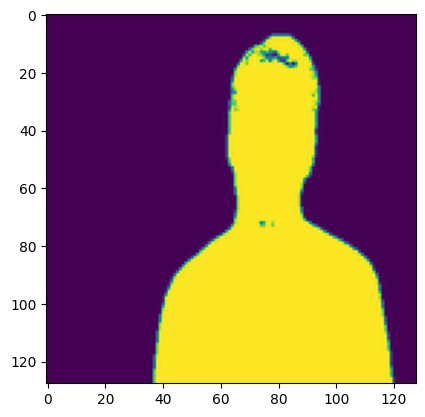

In [92]:
p1="human-segmentation-main/"+df["masks"][1]
img=Image.open(p1)
img=img.resize((128,128),Image.LANCZOS)
plt.imshow(img)

plt.show()

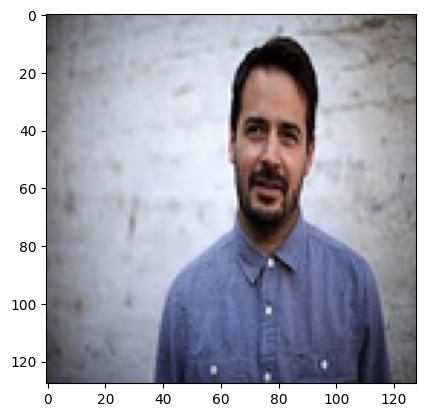

In [93]:
p1="human-segmentation-main/"+df["images"][1]
img2=Image.open(p1)
img2=img2.resize((128,128),Image.LANCZOS)
plt.imshow(img2)

plt.show()

In [94]:
img=np.array(img)
img2=np.array(img2)

shape=img2.shape
img2[0][0],img[120]

(array([64, 59, 55], dtype=uint8),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  74, 255,
        251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 255,  45,   0,   2,   0,   0,   0,   0,   0,   0], dtype=uint8))

In [95]:
overlapped=[]
for i in range(shape[0]):
    l1=[]
    for j in range(shape[1]):
        if img[i][j]>100:
            
            tem=img2[i][j]
        else :
            tem=img2[i][j]*0
        l1.append(tem)
    overlapped.append(l1)

result=np.array(overlapped)
   

In [96]:
img2.shape

(128, 128, 3)

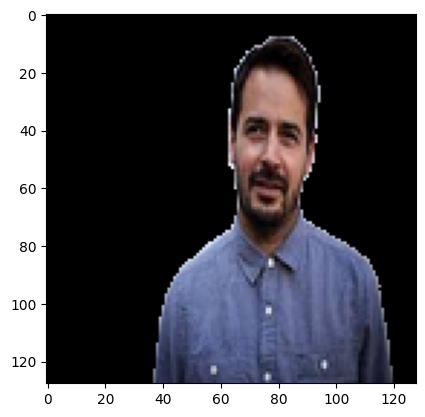

In [97]:
plt.imshow(result)
plt.show()

In [98]:
imsize=128
def load_data(data="train"):
    if data=="train":
        path="images"
        count=df[path].count()
        train = np.zeros((count, imsize, imsize, 3), dtype=np.uint8)
        
    else:
        path="masks"
        count=df[path].count()
        train = np.zeros((count, imsize, imsize), dtype=np.uint8)
        
    
    for i in tqdm(range(count)):    
        path1="human-segmentation-main/"+df[path][i]
        img=Image.open(path1)
        img=img.resize((imsize,imsize),Image.LANCZOS)
        try:
            train[i]=np.array(img)
        except:
            print(i,np.array(img).shape)
    return train


In [99]:
X_train=np.array(load_data())
X_train.shape

 89%|███████████████████████████████████████████████████████████████████████▍        | 259/290 [00:02<00:00, 94.16it/s]

242 (128, 128)


100%|████████████████████████████████████████████████████████████████████████████████| 290/290 [00:03<00:00, 81.86it/s]

287 (128, 128)


(290, 128, 128, 3)

In [100]:
Y_train=np.array(load_data("test"))
Y_train=np.expand_dims(Y_train,axis=3)
Y_train=np.array(Y_train,dtype=np.bool_)
Y_train.shape

100%|███████████████████████████████████████████████████████████████████████████████| 290/290 [00:01<00:00, 253.79it/s]


(290, 128, 128, 1)

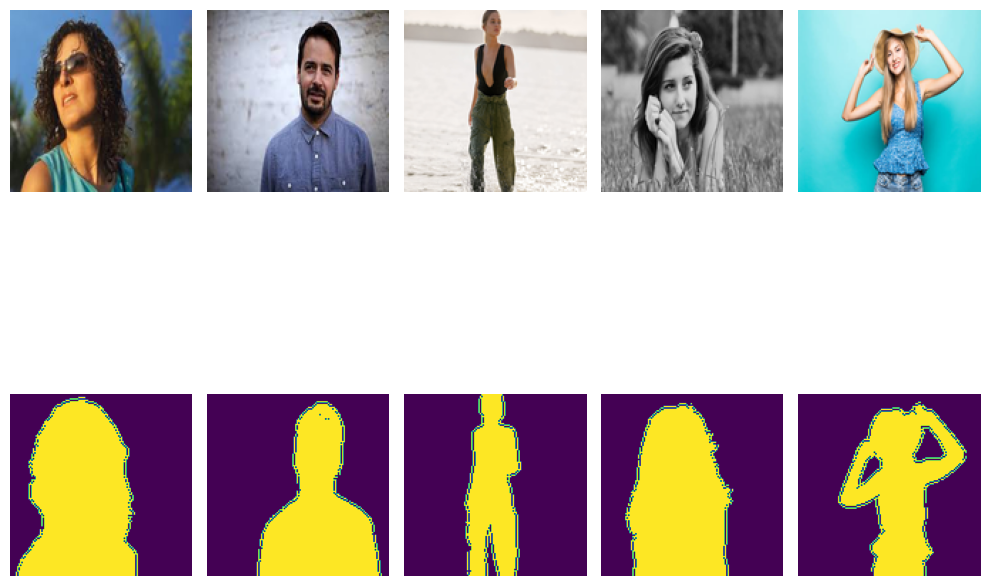

In [101]:
_, axes = plt.subplots(2, 5, figsize=(10, 10))
axes = axes.flatten()
# Convert slices to lists to ensure list concatenation
imgs = list(X_train[:5]) + list(Y_train[:5])

for ax, img in zip(axes, imgs):
    # For grayscale images (shape: 128,128), specify a colormap
    if img.ndim == 2:  
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [102]:
X_train.shape

(290, 128, 128, 3)

In [103]:
X_train.dtype

dtype('uint8')

In [104]:
Y_train.shape

(290, 128, 128, 1)

In [105]:
Y_train.dtype

dtype('bool')

In [202]:
# Model

In [106]:

width = 128
height = 128
channels = 3

inputs=tf.keras.Input((width,height,channels))
s=tf.keras.layers.Lambda(lambda x: x/255)(inputs)
    
# Encoder
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# Decoder
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
   
    



    

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 128, 128, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 128, 128, 16) 448         lambda_4[0][0]                   
__________________________________________________________________________________________________
dropout_36 (Dropout)            (None, 128, 128, 16) 0           conv2d_76[0][0]                  
____________________________________________________________________________________________

In [107]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_background.h5', verbose=1, save_best_only=True)

callbacks = [
        
        tf.keras.callbacks.TensorBoard(log_dir='logs')]
# tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),

In [119]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
17/17 [==============================] - 2s 102ms/step - loss: 0.1770 - accuracy: 0.9265 - val_loss: 0.2382 - val_accuracy: 0.9060
Epoch 2/25
17/17 [==============================] - 1s 78ms/step - loss: 0.1809 - accuracy: 0.9253 - val_loss: 0.2508 - val_accuracy: 0.9088
Epoch 3/25
17/17 [==============================] - 1s 79ms/step - loss: 0.1685 - accuracy: 0.9310 - val_loss: 0.2430 - val_accuracy: 0.9146
Epoch 4/25
17/17 [==============================] - 1s 77ms/step - loss: 0.1957 - accuracy: 0.9182 - val_loss: 0.3587 - val_accuracy: 0.8816
Epoch 5/25
17/17 [==============================] - 1s 78ms/step - loss: 0.2215 - accuracy: 0.9105 - val_loss: 0.2360 - val_accuracy: 0.9060
Epoch 6/25
17/17 [==============================] - 1s 79ms/step - loss: 0.1755 - accuracy: 0.9278 - val_loss: 0.2750 - val_accuracy: 0.8966
Epoch 7/25
17/17 [==============================] - 1s 77ms/step - loss: 0.1571 - accuracy: 0.9351 - val_loss: 0.2622 - val_accuracy: 0.9002
Epoch 8/25
1

In [136]:
# model.save("segmentation_VB.hdf5")
model1=tf.keras.models.load_model("segmentation_VB.hdf5")


In [137]:
# img=plt.imread(r"E:\jupyter\projects\Face detection\data\train\images\img1.png")
# img=plt.imread(r"E:\jupyter\projects\Face detection\data\train\images\img1.png")
img=Image.open(r"E:\jupyter\projects\Face detection\data\train\images\img23.png")
img=img.resize((128,128),Image.LANCZOS)
img=np.array(img)
# img=img[:,:,:3]
img=np.expand_dims(img,axis=0)
img.shape

(1, 128, 128, 3)

In [138]:
pre=model1.predict(img,verbose=1,)

1/1 [==============================] - 0s 411ms/step


In [139]:
pre.shape

(1, 128, 128, 1)

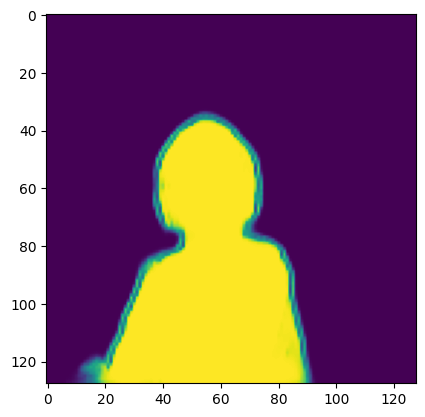

In [140]:
plt.imshow(pre[0])

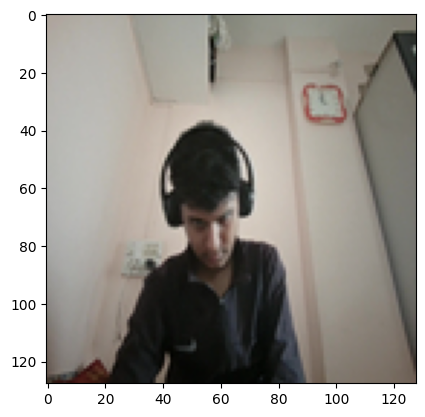

In [141]:
plt.imshow(img[0])

In [142]:
def overlap(img,mask):
    overlapped=[]
    shape=img.shape
    for i in range(shape[0]):
        l1=[]
        for j in range(shape[1]):
            tem=img[i][j]*int(mask[i][j])
            l1.append(tem)
        overlapped.append(l1)
    
    result=np.array(overlapped)
    return result

def overlap_with_background(img):
    bac=plt.imread(r"D:\Desktop\OIP.jpg")
    bac=Image.fromarray(bac)
    bac=bac.resize((128,128),Image.LANCZOS)
    bac=np.array(bac)
    overlapped=[]
    shape=img.shape
    for i in range(shape[0]):
        l1=[]
        for j in range(shape[1]):
            if np.all(img[i][j]==0):
                tem=bac[i][j]
            else:
                tem=img[i][j]
            l1.append(tem)
        overlapped.append(l1)
    
    result=np.array(overlapped)
    return result

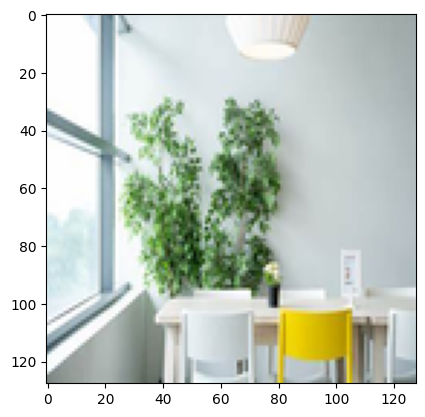

In [143]:
bac=plt.imread(r"D:\Desktop\OIP.jpg")
bac=Image.fromarray(bac)
bac=bac.resize((128,128),Image.LANCZOS)
bac=np.array(bac)

plt.imshow(bac)

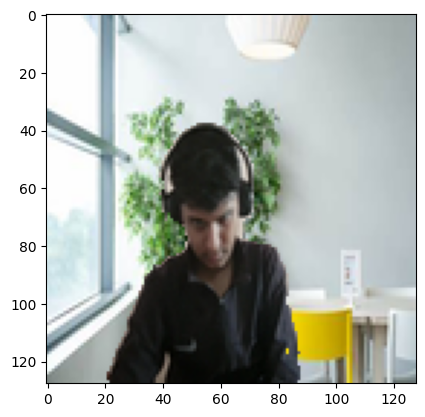

In [144]:
tem=np.round(pre,decimals=1)
imp=overlap(img[0],tem[0])
imp=overlap_with_background(imp)
plt.imshow(imp)

# Live images

In [145]:
import cv2

In [146]:
cap=cv2.VideoCapture(0)
while True:
    score,frame=cap.read()
    frame=cv2.flip(frame,1)

    # frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    pil_img=Image.fromarray(frame)
    frame_resize=pil_img.resize((128,128),Image.LANCZOS)
    # frame_resize=cv2.resize(frame,(128,128),interpolation=cv2.INTER_CUBIC)
    
    frame=np.array(frame_resize)
    frame=np.expand_dims(frame,axis=0)
    
    mask=model1.predict(frame)
    mask=np.round(mask,decimals=1)
    frame=overlap(frame[0],mask[0])
    frame=overlap_with_background(frame)

    pil_img=Image.fromarray(frame)
    frame_resize=pil_img.resize((640,480),Image.LANCZOS)
    # frame_resize=cv2.resize(frame,(640,480),interpolation=cv2.INTER_CUBIC)
    
    frame=np.array(frame_resize)
    
    
    if cv2.waitKey(1)==ord("q"):
        break
    cv2.imshow("CAM1",frame)
cap.release()
cv2.destroyAllWindows()

In [147]:
frame.shape

(480, 640, 3)